# Punto 2 de la actividad 1 de estadistica 3

In [1]:
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib import style
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import plotly.express as px


importamos las librerias.

In [2]:
df = pd.read_csv('./CARS.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


Importados la base de datos.

In [3]:
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


### 2.1.1. Para las variables categóricas un gráfico de barras. Categoría numero de observaciones.

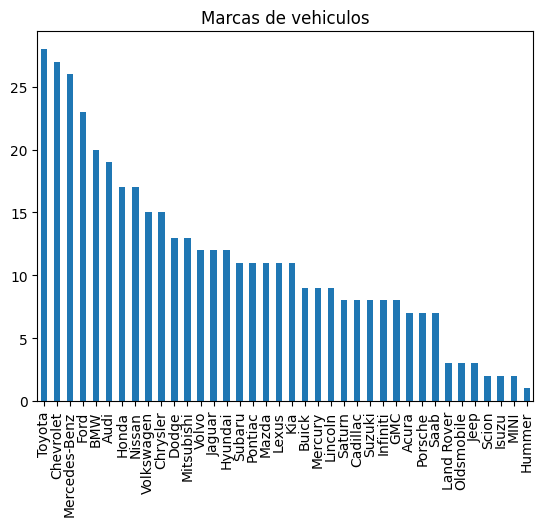

In [35]:
plot = (df['Make'].value_counts()).plot(
kind='bar', title='Marcas de vehiculos')

Este gráfico lista la cantidad de vehículos por marca dentro del conjunto, se puede ver también un alto desbalance en la cantidad de vehículos como es el caso de Toyota o Hummer

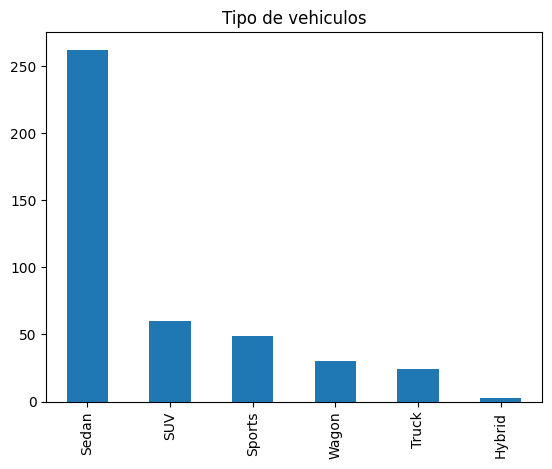

In [36]:
plot = (df['Type'].value_counts()).plot(
kind='bar', title='Tipo de vehiculos')

Este gráfico evidencia el desbalance que existen entre los diferentes tipos de vehículo, aquí cabe destacar que incluso los vehículos Híbridos podrían ser considerados outlyers.

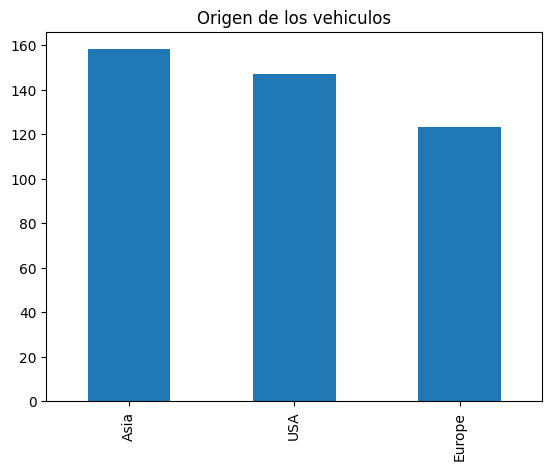

In [38]:
plot = (df['Origin'].value_counts()).plot(
kind='bar', title='Origen de los vehiculos')

Se puede ver un balance generar entre el lugar de origen de los vehículos.

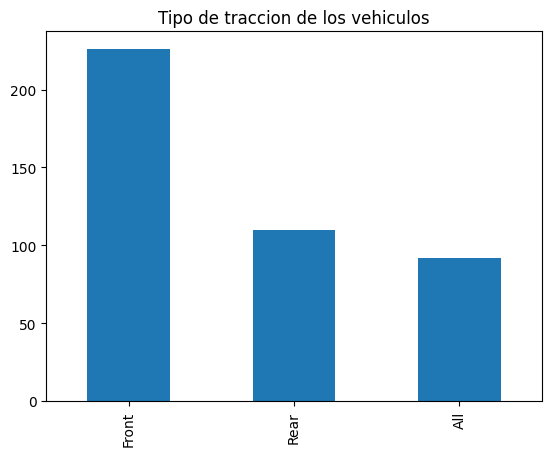

In [39]:

plot = (df['DriveTrain'].value_counts()).plot(
kind='bar', title='Tipo de traccion de los vehiculos')

De la gráfica podemos concluir que la gente tiende a preferir los vehículos de tracción frontal y en menor medida, los de otro tipo.

### 2.1.2. Para las variables numéricas crear histogramas. Listar los modelos de carros que están más lejos de 4 estándares de desviación, y serían considerados outliers. Hacer test de si es una distribución normal o no.

(array([ 49., 110., 102.,  71.,  65.,  15.,  14.,   1.,   0.,   1.]),
 array([1.3, 2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3]),
 <BarContainer object of 10 artists>)

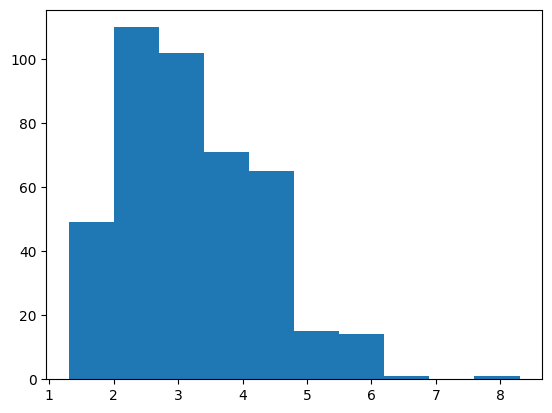

In [8]:
plt.hist(df[["EngineSize"]])

La gráfica del tamaño del motor, muestra una dominancia de los vehículos de 2.5 y una distribución relativamente normal, también se ven algunos Outlyers por encima de 6.0.

(array([  1., 136.,   7., 190.,   0.,  87.,   0.,   2.,   0.,   3.]),
 array([ 3. ,  3.9,  4.8,  5.7,  6.6,  7.5,  8.4,  9.3, 10.2, 11.1, 12. ]),
 <BarContainer object of 10 artists>)

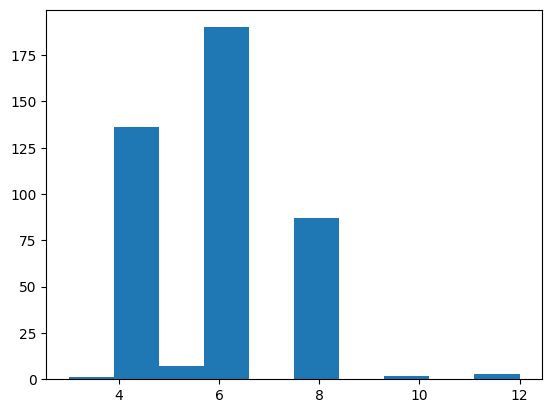

In [9]:
plt.hist(df["Cylinders"])

Con respecto al cilindraje, podemos ver muchas inconsistencias en los datos, ya que fuera del grupo 4,6,8 hay una gran escasez de datos.

(array([ 31., 195., 142.,  44.,   9.,   4.,   0.,   1.,   0.,   2.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <BarContainer object of 10 artists>)

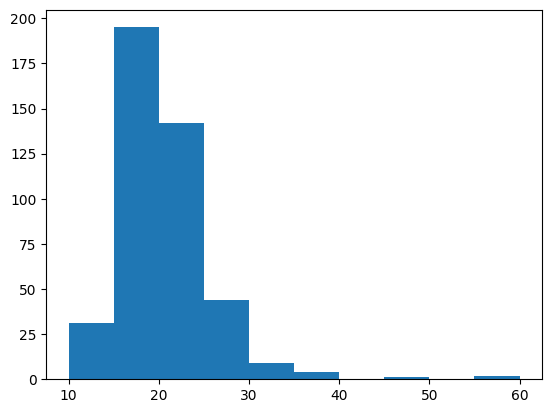

In [10]:
plt.hist(df["MPG_City"])

Respecto a las millas por galón, en la ciudad podemos ver casi una distribución normal, de no ser por los outlyers a la derecha de la gráfica y la alta dominancia de los vehículos entre 20 y 30 millas.

(array([ 14.,  69., 205.,  97.,  32.,   7.,   1.,   2.,   0.,   1.]),
 array([12. , 17.4, 22.8, 28.2, 33.6, 39. , 44.4, 49.8, 55.2, 60.6, 66. ]),
 <BarContainer object of 10 artists>)

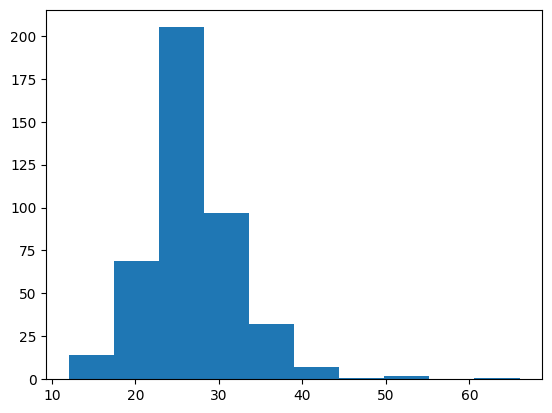

In [11]:

plt.hist(df["MPG_Highway"])

En esta gráfica se ve prácticamente una réplica de la anterior, lo que indica que el rendimiento de los vehículos no cambia tanto dependiendo del terreno.

(array([ 11.,  67., 123., 122.,  62.,  25.,  11.,   4.,   2.,   1.]),
 array([1850., 2384., 2918., 3452., 3986., 4520., 5054., 5588., 6122.,
        6656., 7190.]),
 <BarContainer object of 10 artists>)

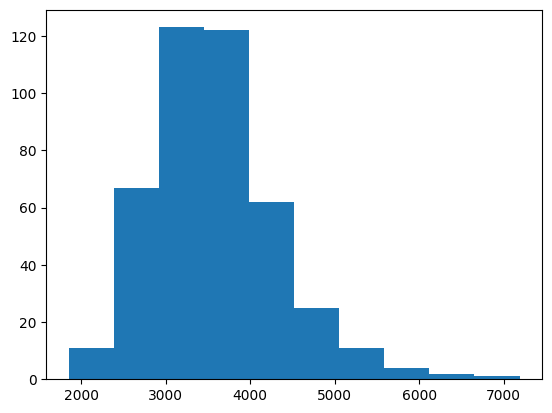

In [12]:

plt.hist(df["Weight"])

Con respecto al peso, vemos una tendencia a la derecha, pero una fuerte concentración alrededor de los 3000-4000 y algunos datos atípicos por sobre los 6000.

(array([ 11.,  41., 114., 118.,  92.,  26.,  11.,   9.,   3.,   3.]),
 array([ 89. ,  94.5, 100. , 105.5, 111. , 116.5, 122. , 127.5, 133. ,
        138.5, 144. ]),
 <BarContainer object of 10 artists>)

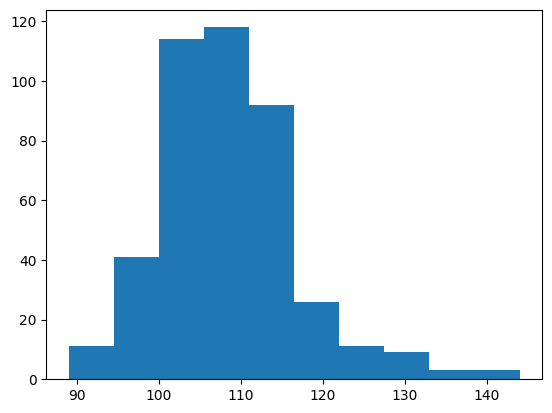

In [13]:
plt.hist(df["Wheelbase"])	

La distancia entre los ejes de los vehículos también parece seguir cierta tendencia alrededor de los 110, con algunos datos atípicos a la derecha.

(array([  3.,  17.,  35., 100., 120.,  78.,  51.,  13.,   9.,   2.]),
 array([143. , 152.5, 162. , 171.5, 181. , 190.5, 200. , 209.5, 219. ,
        228.5, 238. ]),
 <BarContainer object of 10 artists>)

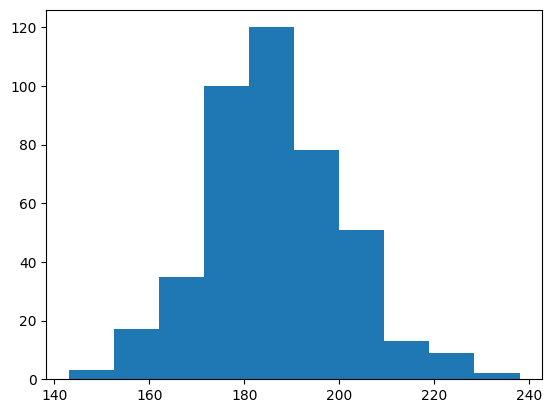

In [14]:
plt.hist(df["Length"])

Podemos ver una distribución normal de las longitudes de los vehículos, con una tendencia a agruparse alrededor de los 160.

### Listar los modelos de carros que están más lejos de 4 estándares de desviación

In [15]:
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)
col = ['Invoice',"EngineSize"	,"Cylinders",	"Horsepower",	"MPG_City",	"MPG_Highway",	"Weight",	"Wheelbase",	"Length"]
df_stand = (df[col] - df[col].mean())/df[col].std()
df_stand

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0.188316,0.273563,0.123513,0.683703,-0.584311,-0.669452,1.150285,-0.259174,0.183720
1,-0.467841,-1.079501,-1.159819,-0.221136,0.752022,0.723985,-1.053980,-0.860727,-1.000290
2,-0.304255,-0.718684,-1.159819,-0.221136,0.370212,0.375626,-0.458447,-0.379485,-0.234166
3,0.016115,0.002951,0.123513,0.753306,-0.011597,0.201446,-0.003891,-0.018553,-0.025223
4,0.510103,0.273563,0.123513,0.126879,-0.393406,-0.495272,0.397962,0.823622,0.740901
...,...,...,...,...,...,...,...,...,...
423,0.464134,-0.718684,-0.518153,-0.262898,0.179308,0.201446,-0.168585,-0.379485,-0.025223
424,0.570697,-0.808888,-0.518153,0.363529,-0.011597,-0.146913,-0.168585,-0.379485,-0.025223
425,0.711836,-0.267662,0.123513,0.725464,-0.202502,-0.146913,0.098878,0.222069,0.253368
426,-0.304595,-1.169705,-1.159819,-0.638753,0.370212,0.375626,-0.996008,-0.860727,-0.443109


Filtramos las columnas que nos interesan.

In [16]:
OutLyers = df_stand.query("(Invoice > 4.0 or Invoice <-4.0) or (EngineSize > 4.0 or EngineSize <-4.0) or (Cylinders > 4.0 or Cylinders <-4.0) or (Horsepower > 4.0 or Horsepower <-4.0)or (MPG_City > 4.0 or MPG_City <-4.0)"
               "or (MPG_Highway > 4.0 or MPG_Highway <-4.0)or (Weight > 4.0 or Weight <-4.0)"
               "or (Wheelbase > 4.0 or Wheelbase <-4.0)or (Length > 4.0 or Length <-4.0)")
OutLyers

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
87,0.305196,2.528671,1.406846,1.170923,-1.347929,-1.714529,1.615381,4.312632,3.596454
114,2.518762,4.603369,2.690178,3.955041,-1.538834,-1.191991,-0.221287,-1.101349,-0.721699
118,0.367263,3.250305,2.690178,1.310129,-1.920643,-2.411248,4.759060,3.470458,2.830330
146,-0.420057,1.446219,1.406846,0.962114,-0.584311,-1.191991,1.278087,4.312632,3.039273
149,-0.655460,-1.620727,-1.159819,-1.710639,4.951923,4.207577,-1.114588,-0.620106,-0.791347
150,-0.686068,-1.079501,-1.801485,-1.989051,7.624588,6.820271,-2.276669,-1.582592,-2.184299
262,5.077922,2.077649,3.973511,3.857597,-1.347929,-1.366170,1.179271,0.703312,0.671253
270,4.725810,2.077649,1.406846,3.857597,-1.157025,-1.017811,0.865693,-0.860727,-0.512756
271,4.978954,2.077649,3.973511,3.857597,-1.347929,-1.366170,1.121298,-0.860727,-0.512756
334,8.136512,0.363768,0.123513,3.634868,-0.584311,-0.495272,-0.588884,-1.823213,-0.791347


Hacemos la consulta y obtenemos los datos que están a más de 4 desviaciones estándar.

In [17]:

df_Excluide = df_stand.query(
                "(Invoice < 4.0 or Invoice >-4.0)"
                "or (EngineSize < 4.0 or EngineSize >-4.0)"
                "or (Cylinders < 4.0 or Cylinders >-4.0)"
                " or (Horsepower < 4.0 or Horsepower >-4.0)"
                "or (MPG_City < 4.0 or MPG_City >-4.0)"
                "or (MPG_Highway < 4.0 or MPG_Highway >-4.0)"
                "or (Weight < 4.0 or Weight >-4.0)"
                "or (Wheelbase < 4.0 or Wheelbase >-4.0)"
                "or (Length < 4.0 or Length >-4.0)")
df_Excluide

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0.188316,0.273563,0.123513,0.683703,-0.584311,-0.669452,1.150285,-0.259174,0.183720
1,-0.467841,-1.079501,-1.159819,-0.221136,0.752022,0.723985,-1.053980,-0.860727,-1.000290
2,-0.304255,-0.718684,-1.159819,-0.221136,0.370212,0.375626,-0.458447,-0.379485,-0.234166
3,0.016115,0.002951,0.123513,0.753306,-0.011597,0.201446,-0.003891,-0.018553,-0.025223
4,0.510103,0.273563,0.123513,0.126879,-0.393406,-0.495272,0.397962,0.823622,0.740901
...,...,...,...,...,...,...,...,...,...
423,0.464134,-0.718684,-0.518153,-0.262898,0.179308,0.201446,-0.168585,-0.379485,-0.025223
424,0.570697,-0.808888,-0.518153,0.363529,-0.011597,-0.146913,-0.168585,-0.379485,-0.025223
425,0.711836,-0.267662,0.123513,0.725464,-0.202502,-0.146913,0.098878,0.222069,0.253368
426,-0.304595,-1.169705,-1.159819,-0.638753,0.370212,0.375626,-0.996008,-0.860727,-0.443109


Creamos un nuevo modelo donde excluimos los resultados anteriores.

### Hacer test de si es una distribución normal o no.

In [18]:
k2, p = stats.normaltest(df[["Invoice"]].query("Invoice <= 50000")["Invoice"].values)
alpha = 1e-3

print("It is not normal " if p < alpha else "It is normal ")

It is not normal 


In [19]:
k1,p = stats.shapiro(df_Excluide)
print("It is not normal " if p < alpha else "It is normal ")

It is normal 


In [20]:
k1,p = stats.shapiro(df[col])
print("It is not normal " if p < alpha else "It is normal ")

It is normal 




### 2.2. Gráfico de la relación de cada variable con respecto a MPG_City:

### 2.2.1. Variables categóricas debes crear un boxplot. Explique cómo interpreta el gráfico

In [21]:
fig = px.box(df,x= "Make",y = "MPG_City")
fig.show()

- En este gráfico podemos ver la distribución de los vehículos por marca, en función de las millas que recorren por galón. Para el caso de cajas más pequeñas, podemos concluir que los vehículos de estas marcas tienden a recorrer las mismas distancias. Pero en el caso de Honda, por ejemplo, podemos ver que sus vehículos no siguen una tendencia en las millas que recorren, lo que hace que el gráfico se vea tan estirado.

In [22]:

fig = px.box(df,x= "Type",y = "MPG_City")
fig.show()

- Con respecto al tipo de vehículo, podemos ver que los más eficientes son los híbridos, ya que se evidencia su alta eficiencia al recorrer tantas millas a un bajo coste; los demás parecen estar alrededor de las 20 millas por galón y no parecen tener cambios significativos entre sí.

In [23]:
fig = px.box(df,x= "Origin",y = "MPG_City")
fig.show()

- La relación de las millas por galón con el origen de los vehículos, no varía mucho. Lo que si es destacable, es la cantidad de datos atípicos de los vehículos asiáticos.

In [24]:

fig = px.box(df,x = "DriveTrain", y = "MPG_City")
fig.show()

- A partir del tipo de tracción, se puede concluir que los vehículos de tracción frontal, recorren más millas por galón que los otros, esto sin descartar el hecho de que hay demasiada variabilidad de los datos en este tipo de vehículo, lo que posiblemente esté afectando la interpretación de los datos.

### 2.2.2. Variables numéricas vas a crear un scatter plot.Explique cómo interpreta el gráfico


In [25]:
fig = px.scatter_matrix(df_Excluide[["MPG_City","Invoice"]])
fig.show()

- La eficiencia del carro no depende, directamente, de su costo. De hecho, se evidencia una relación inversamente proporcional entre las variables.

In [26]:
fig = px.scatter_matrix(df_Excluide[["MPG_City","EngineSize"]])
fig.show()

- Nuevamente, vemos que el tamaño del motor no está relacionado con la eficiencia del mismo, parece ser que los motores más comunes están entre 0 y 2.

In [27]:
fig = px.scatter_matrix(df_Excluide[["MPG_City","Cylinders"]])
fig.show()

- El número de cilindros es inversamente proporcional a la cantidad de millas por galón que recorre.

In [28]:
fig = px.scatter_matrix(df_Excluide[["MPG_City","Horsepower"]])
fig.show()

- Los caballos de fuerza no son significativos para determinar el consumo de combustible por milla de cada vehículo.

In [29]:
fig = px.scatter_matrix(df_Excluide[["MPG_City","MPG_Highway"]])
fig.show()

- La relación entre el tipo de suelo o recorrido de los vehículos es casi la misma, por lo que no se encuentran diferencias relevantes en esta gráfica como para sacar una conclusión más allá de que el consumo no depende del terreno.

In [30]:
fig = px.scatter_matrix(df_Excluide[["MPG_City","Weight"]])
fig.show()

- Aquí podemos evidenciar que a mayor peso menos distancia por galón recorren los vehículos.

In [31]:
fig = px.scatter_matrix(df_Excluide[["MPG_City","Wheelbase"]])
fig.show()

- El tipo de tracción afecta notablemente la distancia por galón.

In [32]:
fig = px.scatter_matrix(df_Excluide[["MPG_City","Length"]])
fig.show()

- En el gráfico podemos ver que con autos más pequeños se obtiene mayores distancias, lo que nos indica una relación inversa entre las variables.

### Matriz de correlación.
### 2.3.1. Cree la matriz de correlación, cuales son las variables más importantes para explicar la variabilidad de MPG_City. Explique por qué el coeficiente es negativo o positivo.

In [33]:
corr = df[col].corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Invoice,1.000000,0.564498,0.645226,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.564498,1.000000,0.908002,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.823746,0.787435,0.810341,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.470442,-0.709471,-0.684402,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.434585,-0.717302,-0.676100,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.442332,0.807867,0.742209,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.148328,0.636517,0.546730,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.166586,0.637448,0.547783,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


- Al generar la matriz, podemos ver que la variable que se relaciona más con MPG_City sería, MPG_Higway, cosa que vimos en las gráficas del punto 1 y que describen que en realidad no hay diferencias significativas en el consumo de combustible y el terreno.

- Por otra parte, la variable que más importante considero que sería el peso, ya que nos da un estadístico útil acerca del consumo de combustible, las millas recorridas y su relación con el peso de cada vehículo, aquí podemos ver una relación inversamente proporcional bastante significativa, dando a entender que mientras menos pese el vehículo más distancia podrá recorrer por galón. 

### 2.3.2. Cree la matriz de correlación nuevamente removiendo todas los modelos de carro que fueron catalogados como un outlier. Puede utilizar .query(‘Model in["MDX","TSX 4dr"]’ ). Existe alguna variación en la correlación.

In [34]:
corr = df_Excluide.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Invoice,1.000000,0.564498,0.645226,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.564498,1.000000,0.908002,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.823746,0.787435,0.810341,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.470442,-0.709471,-0.684402,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.434585,-0.717302,-0.676100,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.442332,0.807867,0.742209,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.148328,0.636517,0.546730,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.166586,0.637448,0.547783,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


- A partir de las diferentes gráficas vistas en el desarrollo del ejercicio, se puede concluir que los outlyers no representan un cambio significativo dentro de la muestra, esto debido probablemente a la escasa cantidad de estos respecto al tamaño de la muestra.